In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# Read the dataset

In [2]:
df = pd.read_csv('train.csv', delimiter = ',')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Calculate the number of surviving/non-surviving passengers

In [3]:
df_1 = df['Survived']
counts = df_1.value_counts()

#  Displaying it as a bar plot

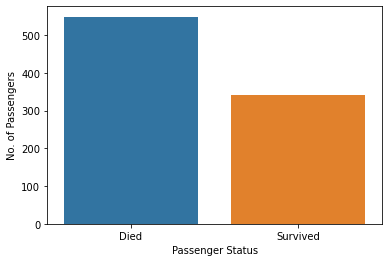

In [4]:
Data = {'Fatalities': ['Died', 'Survived'], 'Number': list(counts)}
Survival = pd.DataFrame(Data)
ax = sns.barplot(x = 'Fatalities', y = 'Number', data = Data);
ax.set_xlabel('Passenger Status');
ax.set_ylabel('No. of Passengers');

# Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

In [5]:
Class = df['Pclass']
Survive_1 = np.sum((df_1 == 1) & (Class == 1))
First_Class = np.sum(Class == 1)
x = (Survive_1/First_Class)*100      #Percentage of surviving 1st class passengers
print(x, '%')

62.96296296296296 %


# Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

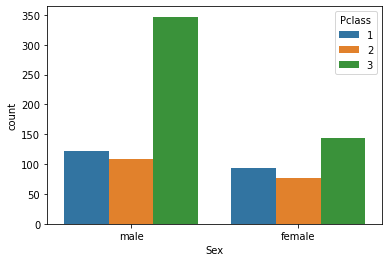

In [6]:
sns.countplot(x = 'Sex', data = df, hue = 'Pclass'); 
#source: https://seaborn.pydata.org/generated/seaborn.countplot.html

# Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [9]:
import seaborn as sns

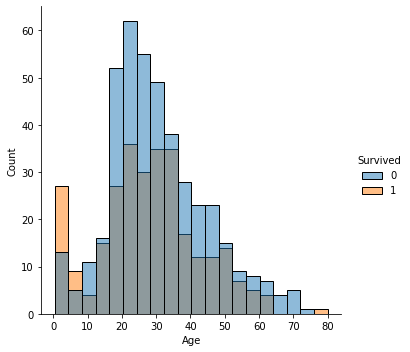

In [10]:
sns.displot(x = 'Age', hue = 'Survived', data = df);
#sns.displot(data = df_train)

# Calculate the average age for survived and drowned passengers separately.

In [11]:
Survived_avg_age = df['Age'].loc[(df['Survived'] == 1)].mean()
Survived_avg_age

28.343689655172415

In [12]:
Drowned_avg_age = df['Age'].loc[(df['Survived'] == 0)].mean()
Drowned_avg_age

30.62617924528302

# Replace missing age values by the mean age.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


No. of rows missing Age values

In [14]:
no_of_missing_age = np.sum(df['Age'].isna())
no_of_missing_age

177

In [15]:
All_Age = df['Age'] = df['Age'].fillna(value = df['Age'].mean())
All_Age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

# Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

In [16]:
Table = df.groupby(['Pclass', 'Sex'])['Survived'].sum()
Table

Pclass  Sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: Survived, dtype: int64

## Using Machine Learning Algorithm - Logistic Regression to predict the survivors

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
# removing the Name, Ticket and PassengerId columns as they contain no predictive power.

df.drop(['Name', 'Ticket', 'PassengerId'], axis = 1, inplace = True)



In [20]:
X = df.drop(['Survived'], axis = 1)
y = df['Survived']

In [21]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [24]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
57,3,male,28.500000,0,0,7.2292,NaN,C
717,2,female,27.000000,0,0,10.5000,E101,S
431,3,female,29.699118,1,0,16.1000,NaN,S
633,1,male,29.699118,0,0,0.0000,NaN,S
163,3,male,17.000000,0,0,8.6625,NaN,S


## Feature engineering using Pipeline

In [25]:
def SibSp_func(SibSp):
    
    '''This function groups all SibSp values larger than 1
    into a new category, i.e. category 2'''
    
    SibSp = np.array((SibSp)).flatten()
    res = [x if int(x) < 2 else 2 for x in SibSp]
    
    return np.array(res).reshape((len(SibSp), 1))

SibSp_grouper = FunctionTransformer(SibSp_func)

def Parch_func(Parch):
    
    '''This function groups all Parch values larger than 3
    into a new category, i.e. category 3'''
    
    Parch = np.array((Parch)).flatten()
    res = [x if int(x) < 3 else 3 for x in Parch]
    
    return np.array(res).reshape((len(Parch), 1))

Parch_grouper = FunctionTransformer(Parch_func)

SibSp_pipeline = make_pipeline(SibSp_grouper,
                              OneHotEncoder())

Parch_pipeline = make_pipeline(Parch_grouper,
                              OneHotEncoder())

feature_trans = ColumnTransformer([
                                  ('Handling_SibSp', SibSp_grouper, ['SibSp']),
                                  ('Handling_Parch', Parch_grouper, ['Parch']),
                                  ('Handling_Pclass_Embarked', OneHotEncoder(), ['Pclass', 'Embarked']),
                                  ('Handling_Sex', OneHotEncoder(drop = 'first'), ['Sex']),
                                  ('Handling_Fare_Age', MinMaxScaler(), ['Age', 'Fare']),
                                  ])

### Fitting the training data with Column Transformer

In [26]:
feature_trans.fit(X_train)
X_train_trans = feature_trans.transform(X_train)

X_train_trans.shape

(712, 12)

### Fitting the Logistic Regression model on transformed train data

In [27]:
lr = LogisticRegression()
lr.fit(X_train_trans, y_train)

LogisticRegression()

## Evaluating the performance of the model

### Transforming the test data

In [28]:
X_test_trans = feature_trans.transform(X_test)

### Now evaluating the model performance:

In [29]:
print('Accuracy = {}'.format(np.round(lr.score(X_test_trans, y_test), 3)))

y_pred = lr.predict(X_test_trans)

print('Recall = {}'.format(np.round(recall_score(y_test, y_pred), 3)))
print('Precision = {}'.format(np.round(precision_score(y_test, y_pred), 3)))
print('f1-score = {}'.format(np.round(f1_score(y_test, y_pred), 3)))

Accuracy = 0.81
Recall = 0.694
Precision = 0.741
f1-score = 0.717


### Confusion Matrix

![alt text](Confusion_Matrix.jpeg "Confusion Matrix")

In [30]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,102,15
1,19,43
